# Load Library

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Datasets

In [2]:
df_train = pd.read_csv("./Datasets/app_train.csv")
df_test = pd.read_csv("./Datasets/app_test.csv")

In [3]:
df_train

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,130325,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,294665,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,73002,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,184610,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


### Analyzing the data
Sebelum kami membuat kesimpulan pada data, terlebih dahulu kami mencoba untuk memahami data yang tujuannya untuk mendapatkan wawasan umum tentang data, yang mencakup:
- Jumlah baris dan kolom
- Tipe data
- Nilai yang hilang
- Duplikasi data
- Nilai unik

In [4]:
df_train.shape

(61503, 24)

Seperti yang kami lihat pada data terdapat 61503 baris dan 24 kolom

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         61503 non-null  int64  
 1   LN_ID              61503 non-null  int64  
 2   TARGET             61503 non-null  int64  
 3   CONTRACT_TYPE      61503 non-null  object 
 4   GENDER             61503 non-null  object 
 5   NUM_CHILDREN       61503 non-null  int64  
 6   INCOME             61503 non-null  float64
 7   APPROVED_CREDIT    61503 non-null  float64
 8   ANNUITY            61502 non-null  float64
 9   PRICE              61441 non-null  float64
 10  INCOME_TYPE        61503 non-null  object 
 11  EDUCATION          61503 non-null  object 
 12  FAMILY_STATUS      61503 non-null  object 
 13  HOUSING_TYPE       61503 non-null  object 
 14  DAYS_AGE           61503 non-null  int64  
 15  DAYS_WORK          61503 non-null  int64  
 16  DAYS_REGISTRATION  615

Berdasarkan informasi yang dihasilkan pada `df_train.info()` menunjukan variabel ANNUITY, PRICE, EXT_SCORE_1, EXT_SCORE_1 dan EXT_SCORE_1 memiliki nilai yang hilang. Selanjutnya terdapat variabel numerik (int64, float64) dan kategori (object).

### Check for unique data

In [6]:
df_train.nunique()

Unnamed: 0           61503
LN_ID                61503
TARGET                   2
CONTRACT_TYPE            2
GENDER                   2
NUM_CHILDREN            10
INCOME                 861
APPROVED_CREDIT       3562
ANNUITY               9374
PRICE                  541
INCOME_TYPE              7
EDUCATION                5
FAMILY_STATUS            5
HOUSING_TYPE             6
DAYS_AGE             16257
DAYS_WORK             8524
DAYS_REGISTRATION    13153
DAYS_ID_CHANGE        5824
WEEKDAYS_APPLY           7
HOUR_APPLY              24
ORGANIZATION_TYPE       58
EXT_SCORE_1          25814
EXT_SCORE_2          46296
EXT_SCORE_3            744
dtype: int64

### Check for missing values data

Mencari gambaran data yang hilang pada masing-masing kolom

In [7]:
df_train.isnull().sum()

Unnamed: 0               0
LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

In [8]:
print("Pecentage of missing value:\n\n",round((df_train.isnull().sum()/(len(df_train)))*100, 3))

Pecentage of missing value:

 Unnamed: 0            0.000
LN_ID                 0.000
TARGET                0.000
CONTRACT_TYPE         0.000
GENDER                0.000
NUM_CHILDREN          0.000
INCOME                0.000
APPROVED_CREDIT       0.000
ANNUITY               0.002
PRICE                 0.101
INCOME_TYPE           0.000
EDUCATION             0.000
FAMILY_STATUS         0.000
HOUSING_TYPE          0.000
DAYS_AGE              0.000
DAYS_WORK             0.000
DAYS_REGISTRATION     0.000
DAYS_ID_CHANGE        0.000
WEEKDAYS_APPLY        0.000
HOUR_APPLY            0.000
ORGANIZATION_TYPE     0.000
EXT_SCORE_1          56.656
EXT_SCORE_2           0.218
EXT_SCORE_3          19.900
dtype: float64


Berdasarkan hasil dari perhitungan dan persentase jumlah data yang hilang, maka terdapat nilai yang hilang pada kolom ANNUITY sebesar 1 (0,002 %), PRICE sebesar 62 (0,101 %), EXT_SCORE_1 sebesar 34845 (56,66 %), EXT_SCORE_2 sebesar 134 (0,22 %) dan EXT_SCORE_3 sebesar 12239 (19,9 %).

## Data Preparation For EDA

Dalam dataset terdapat kolom atau variabel Unnamed: 0 dan LN_ID yang hanya menyimpan nilai ID, dengan demikian kolom tersebut tidak digunakan untuk melakukan prediksi atau visualisasi data.

In [9]:
df_train = df_train.drop(['Unnamed: 0', 'LN_ID'], axis=1)

Dalam dataset terdapat kolom yang memiliki nilai null.
Secara teoritis, 25 hingga 30% adalah nilai maksimum yang hilang yang diizinkan, di luar itu kita mungkin ingin menghapus variabel dari analisis. Pada kasus ini, kami akan menghapus kolom dengan nilai null lebih dari 30%.

In [10]:
df_train = df_train.drop(['EXT_SCORE_1'], axis=1)

Jika kita melihat dengan cermat, kita akan menemukan bahwa meskipun ini adalah hari, mengandung nilai negatif yang tidak valid. Jadi pada bagian ini kita akan melakukan perubahan yang sesuai.

In [11]:
df_train[['DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE']]

,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE
0,-11539,-921,-119.0,-2757
1,-15743,-4482,-1797.0,-2455
2,-20775,365243,-8737.0,-4312
3,-20659,-10455,-4998.0,-4010
4,-9013,-1190,-3524.0,-1644
...,...,...,...,...
61498,-14268,-5813,-2313.0,-2709
61499,-21582,365243,-4106.0,-4191
61500,-17729,-1564,-11844.0,-1263
61501,-11258,-4159,-5060.0,-3698


In [12]:
day_cols = [i for i in df_train if i.startswith('DAYS')]
df_train[day_cols] = abs(df_train[day_cols])

Selanjutnya kami akan melakukan perubahan nilai pada kolom DAYS_AGE menjadi format umur sehingga muda untuk dibaca.

In [13]:
df_train['DAYS_AGE'] = (df_train['DAYS_AGE']/360).astype(int)
df_train['DAYS_AGE'].unique()

array([32, 43, 57, 25, 29, 53, 46, 27, 28, 39, 36, 42, 30, 37, 63, 61, 54,
       55, 66, 50, 51, 26, 64, 38, 62, 59, 35, 65, 34, 31, 58, 40, 45, 33,
       60, 23, 44, 49, 41, 52, 56, 47, 69, 48, 22, 24, 68, 67, 21, 70])

Selanjutnya kami akan melakukan standarisasi terhadap nilai pada kolom FAMILY_STATUS, EDUCATION, HOUSING_TYPE

In [14]:
print(df_train.CONTRACT_TYPE.unique())
print(df_train.GENDER.unique())
print(df_train.INCOME_TYPE.unique())
print(df_train.EDUCATION.unique())
print(df_train.FAMILY_STATUS.unique())
print(df_train.HOUSING_TYPE.unique())
print(df_train.WEEKDAYS_APPLY.unique())

['Revolving loans' 'Cash loans']
['F' 'M']
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['With parents' 'House / apartment' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']
['TUESDAY' 'THURSDAY' 'WEDNESDAY' 'SUNDAY' 'MONDAY' 'FRIDAY' 'SATURDAY']


In [15]:
df_train['FAMILY_STATUS'] = df_train['FAMILY_STATUS'].replace(['Single / not married', 'Civil marriage'], ['Single', 'Married'])
df_train['EDUCATION'] = df_train['EDUCATION'].replace(['Secondary / secondary special'], 'Secondary')
df_train['HOUSING_TYPE'] = df_train['HOUSING_TYPE'].replace(['House / apartment'], 'House')

## Explolatory Data Analysis
Analisis Data Eksplorasi mengacu pada proses penting dalam melakukan penyelidikan awal pada data untuk menemukan pola untuk memeriksa asumsi dengan bantuan statistik ringkasan dan representasi grafis.
- EDA dapat dimanfaatkan untuk  memeriksa outlier, pola, dan tren dalam data yang diberikan.
- EDA membantu menemukan pola yang berarti dalam data.
- EDA memberikan  wawasan mendalam tentang kumpulan data untuk memecahkan masalah bisnis kami.
- EDA memberikan petunjuk untuk memperhitungkan nilai yang hilang dalam kumpulan data 

### Statictic Summary
Informasi memberikan deskripsi data yang cepat dan sederhana.

Dapat mencakup Hitungan, Rata-rata, Standar Deviasi, median, modus, nilai minimum, nilai maksimum, rentang, standar deviasi, dll.

Ringkasan statistik memberikan ide tingkat tinggi untuk mengidentifikasi apakah data memiliki outlier, kesalahan entri data, distribusi data seperti data terdistribusi normal atau miring ke kiri/kanan.

In [16]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TARGET,61503.0,NaN,NaN,NaN,0.080793,0.272519,0.0,0.0,0.0,0.0,1.0
CONTRACT_TYPE,61503,2,Cash loans,55699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,61503,2,F,40549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUM_CHILDREN,61503.0,NaN,NaN,NaN,0.41185,0.716686,0.0,0.0,0.0,1.0,9.0
INCOME,61503.0,NaN,NaN,NaN,169078.871801,133969.661046,26100.0,112500.0,148500.0,202500.0,18000090.0
APPROVED_CREDIT,61503.0,NaN,NaN,NaN,597689.917175,401649.34517,45000.0,270000.0,512446.5,808650.0,4050000.0
ANNUITY,61502.0,NaN,NaN,NaN,27083.323315,14470.508291,2164.5,16506.0,24853.5,34596.0,258025.5
PRICE,61441.0,NaN,NaN,NaN,536903.319811,368574.224006,45000.0,238500.0,450000.0,679500.0,4050000.0
INCOME_TYPE,61503,7,Working,31621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,61503,5,Secondary,43777,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TARGET
0    56534
1     4969
dtype: int64

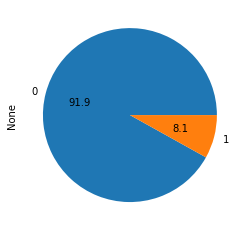

In [17]:
df_train.value_counts('TARGET').plot.pie(autopct="%.1f")
df_train.value_counts('TARGET')

Dataset kita terlihat sangat tidak seimbang. Dapat dilihat target 0 sebanyak 56534 (91,9%) dan target 1 sebanyak 4969 (8,1%). Hal ini akan kita analisis lebih lanjut pada tahapan data modeling.

In [18]:
"""
Sebelum kita melakukan proses EDA lebih lanjut,
terlebih dahulu saya memisahkan variabel numerik dan kategori
unutk memudahkan proses selanjutnya.
"""

numerical_cols = df_train.select_dtypes(include=np.number).columns[1:].tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

print("Categorical Variables: ")
print(categorical_cols)
print("Numerical Variables: ")
print(numerical_cols)

Categorical Variables: 
['CONTRACT_TYPE', 'GENDER', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'WEEKDAYS_APPLY', 'ORGANIZATION_TYPE']
Numerical Variables: 
['NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY', 'EXT_SCORE_2', 'EXT_SCORE_3']


#### Analysis Univariat
- Numerical Variables
- Categorical Variables

NUM_CHILDREN
Skew : 1.83


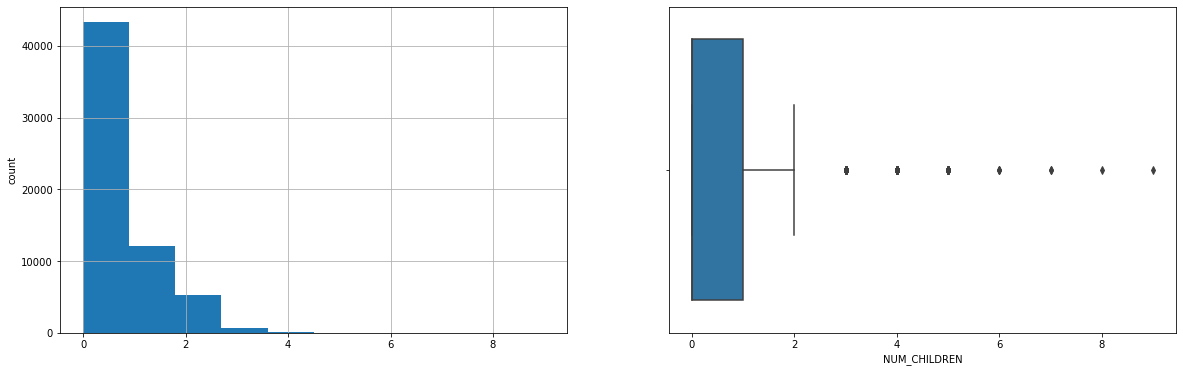

INCOME
Skew : 56.67


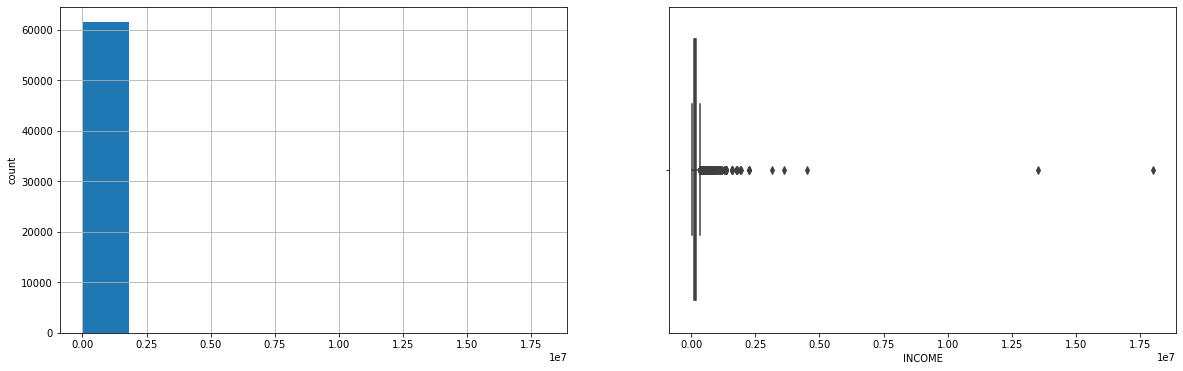

APPROVED_CREDIT
Skew : 1.23


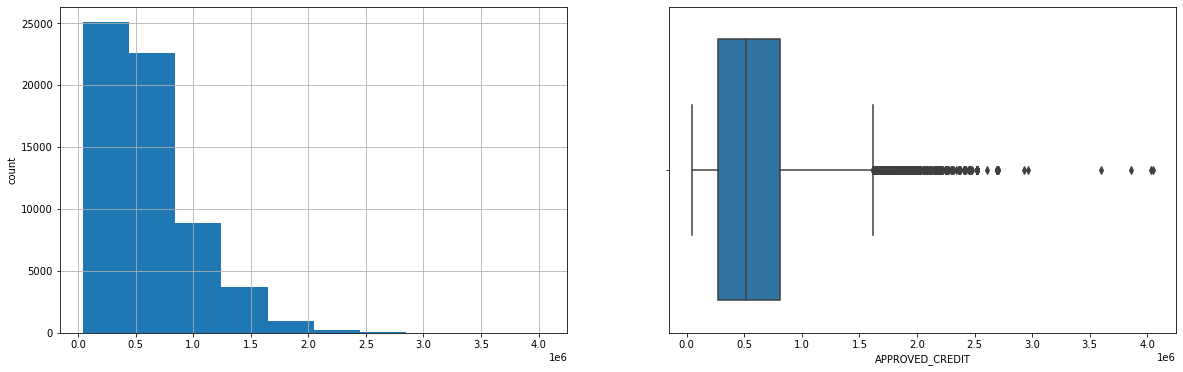

ANNUITY
Skew : 1.56


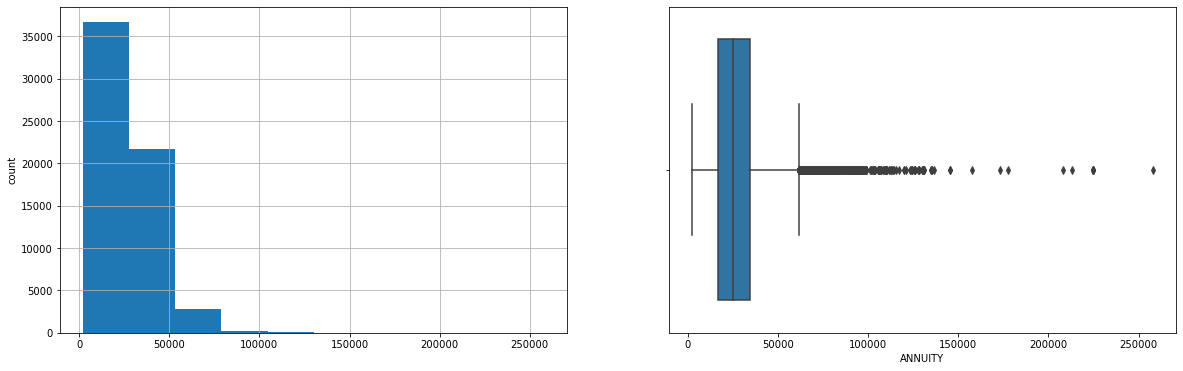

PRICE
Skew : 1.34


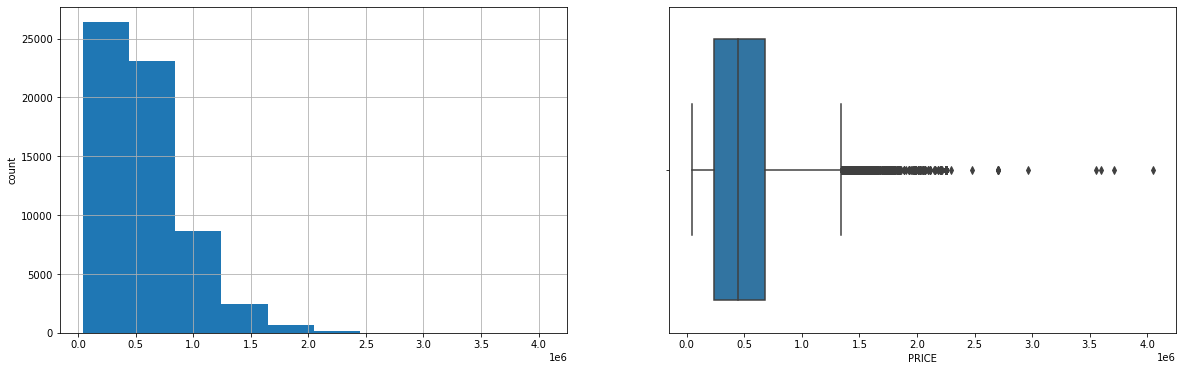

DAYS_AGE
Skew : 0.11


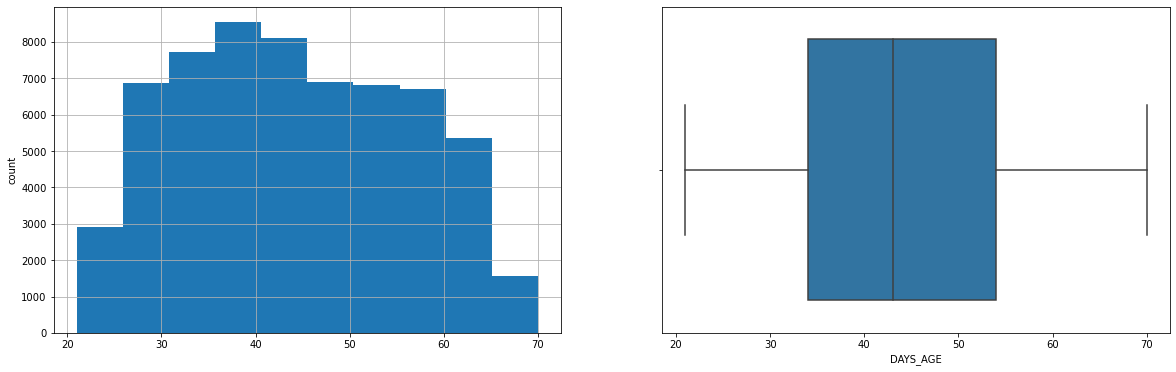

DAYS_WORK
Skew : 1.64


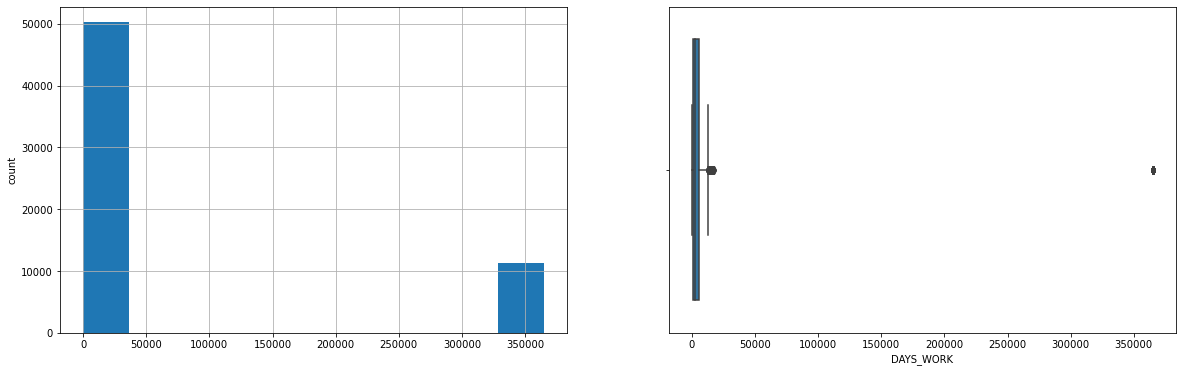

DAYS_REGISTRATION
Skew : 0.58


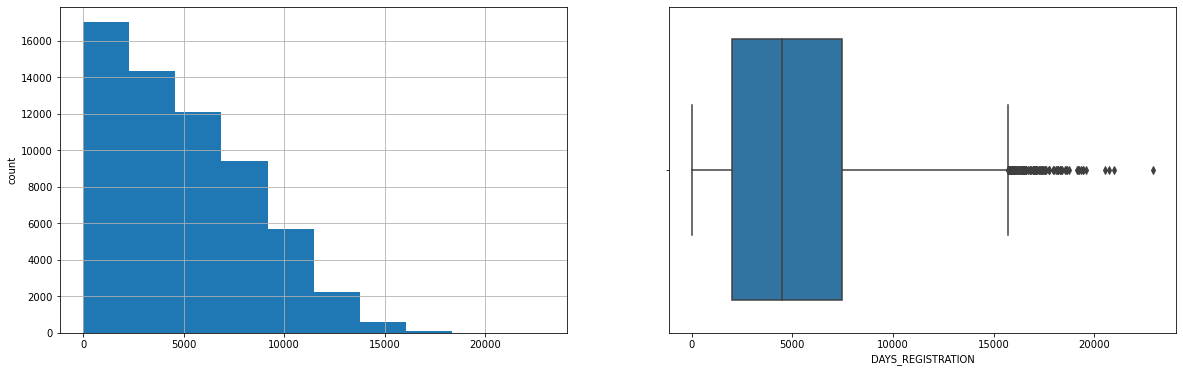

DAYS_ID_CHANGE
Skew : -0.35


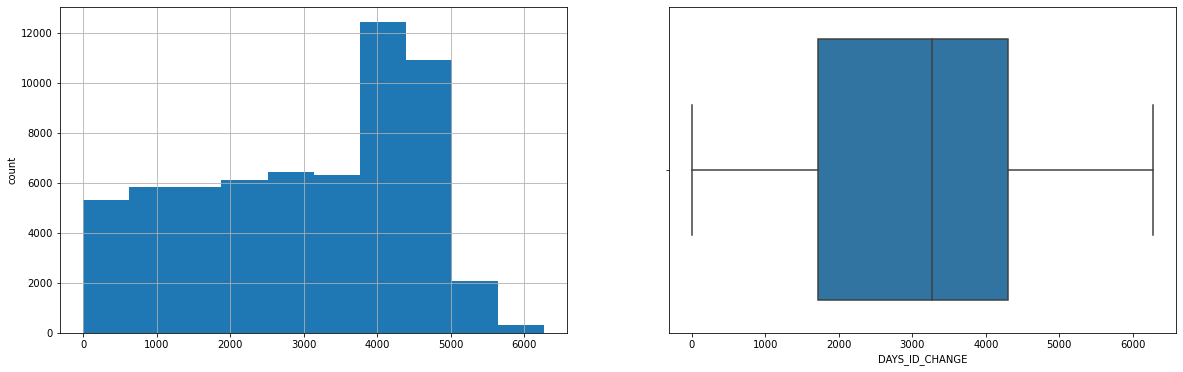

HOUR_APPLY
Skew : -0.02


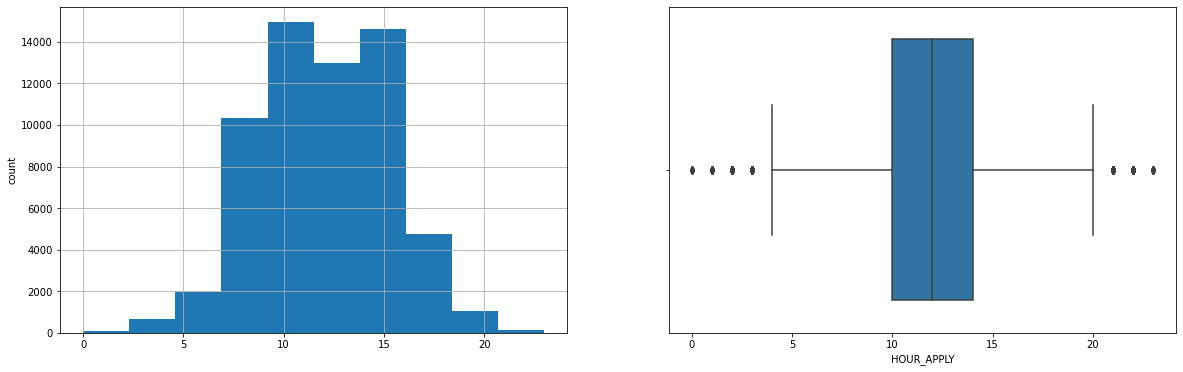

EXT_SCORE_2
Skew : -0.79


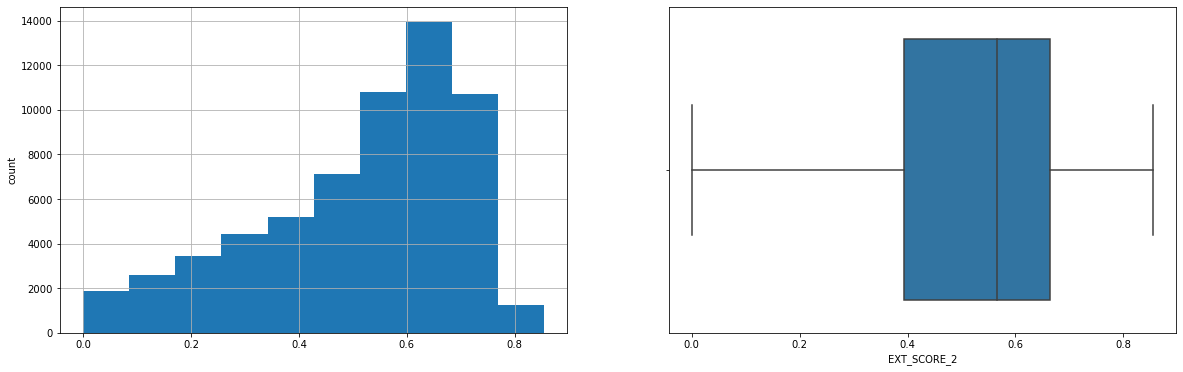

EXT_SCORE_3
Skew : -0.41


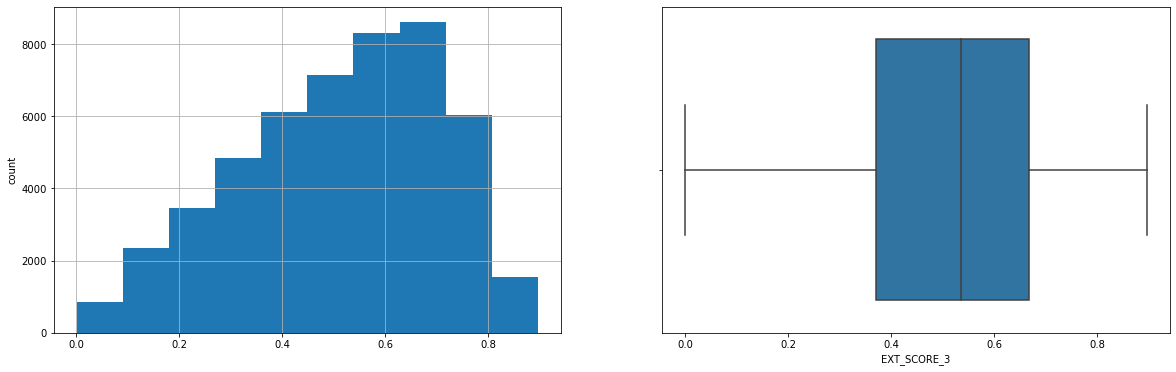

In [19]:
for col in numerical_cols:
    print(col)
    print('Skew :', round(df_train[col].skew(), 2))
    plt.figure(figsize = (20, 6))
    plt.subplot(1, 2, 1)
    df_train[col].hist()
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train[col])
    plt.show()

Dari visualisasi diatas dapat terlihat distribusi data pada tiap-tiap kolom dan data yang terdapat outlier
- NUM_CHILDREN memiliki distribusi yang miring ke kanan (positif skewnes) dan mimiliki nilai outlier yaitu memiliki anak lebih dari 5
- INCOME memiliki nilai IQR sangat tipis dan memiliki banyak outlier
- APPROVED_CREDIT, ANNUITY, PRICE, DAYS_WORK, DAYS_REGISTRATION memiliki banyak nilai outlier 
- HOUR_APPLY memiliki distribusi yang miring ke kiri (negatif skewnes) dan mimiliki nilai outlier kiri dan kanan

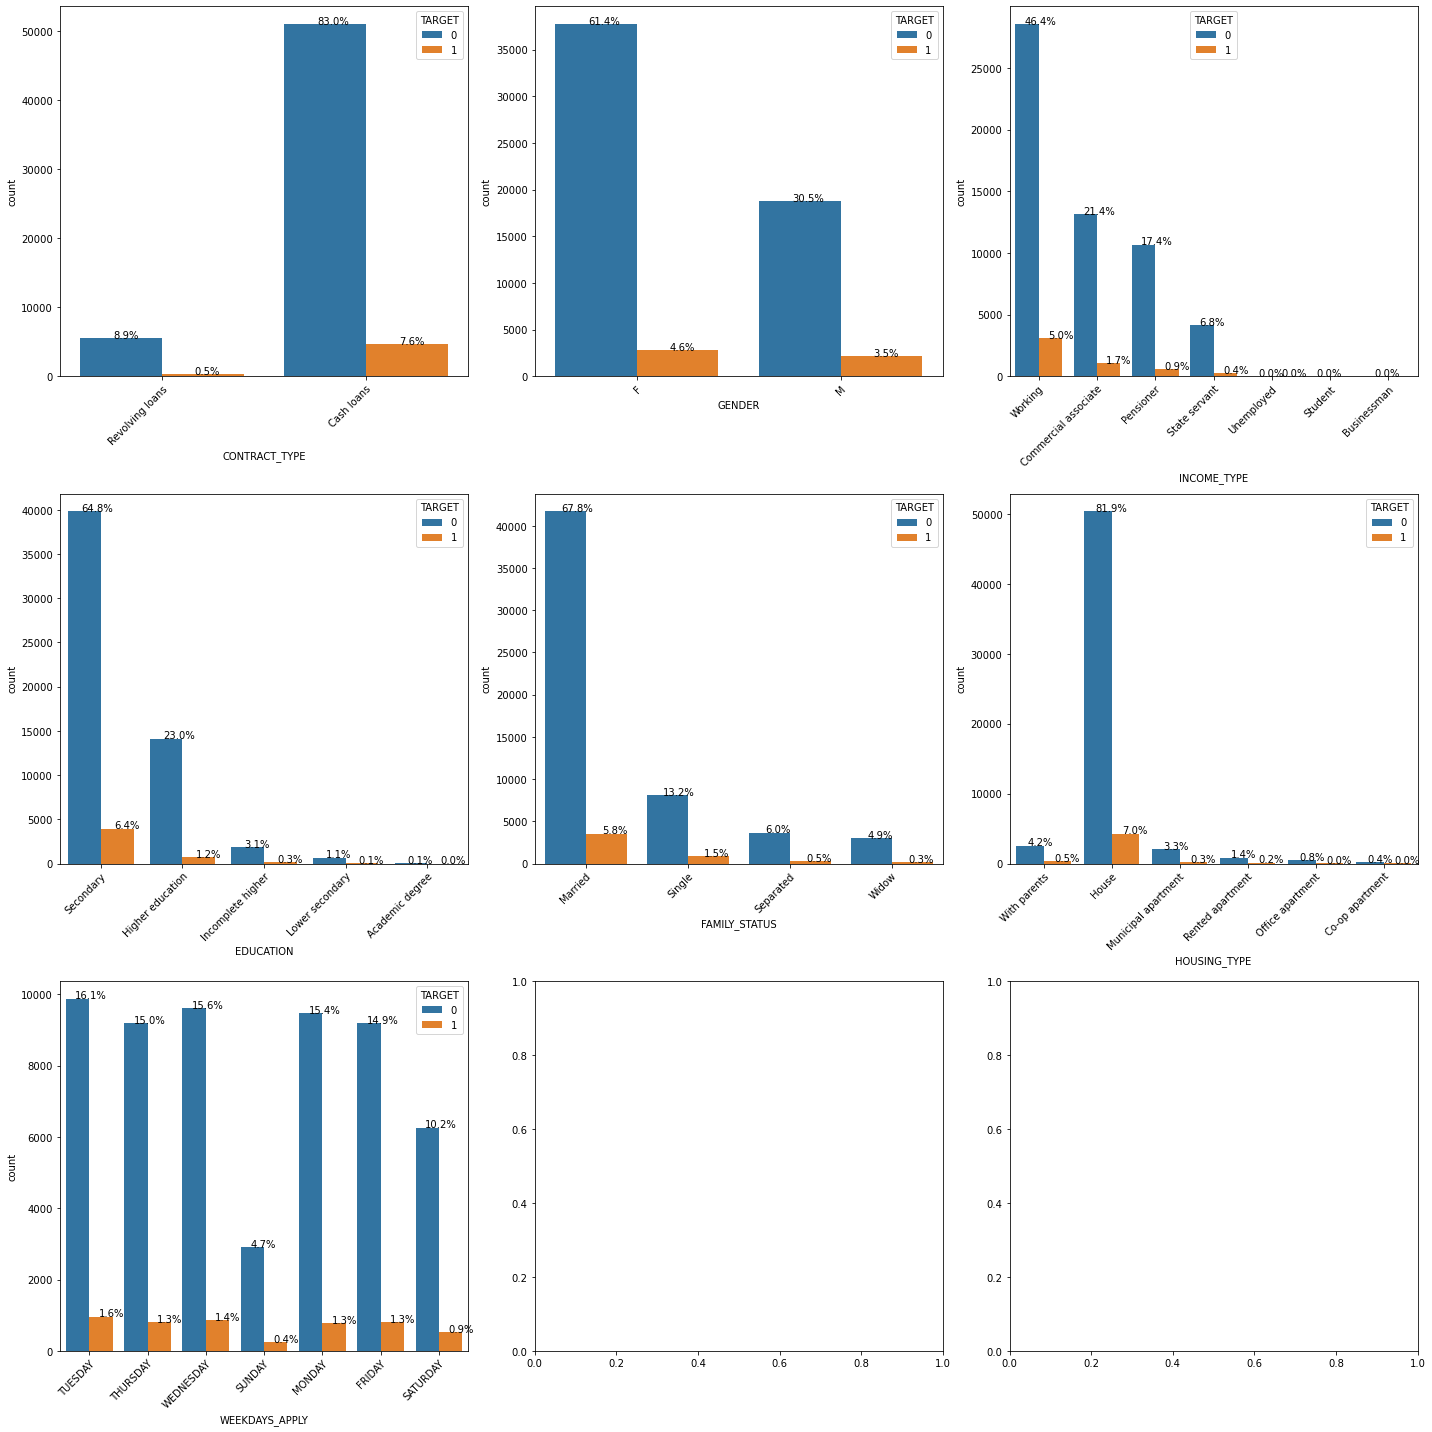

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for feature, ax in zip(df_train[categorical_cols].columns[:-1], axes.ravel()): 
    ax = sns.countplot(df_train[feature], hue=df_train['TARGET'], ax=ax, data=df_train)
    total = len(df_train[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height() + 0.5
        ax.annotate(percentage, (x, y))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")
fig.tight_layout()
plt.show()

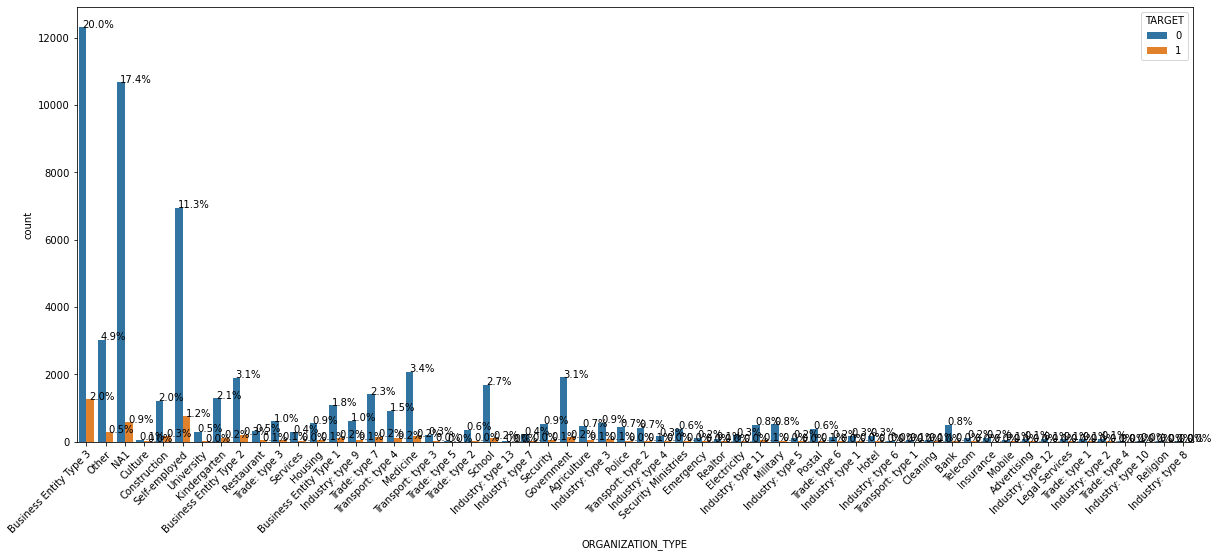

In [21]:

plt.figure(figsize=(20, 8))
ax = sns.countplot(df_train['ORGANIZATION_TYPE'], hue=df_train['TARGET'], data=df_train)
total = len(df_train['ORGANIZATION_TYPE'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100* p.get_height()/total)
    x = p.get_x() + p.get_width() /2.5
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    rotation_mode="anchor")
plt.show()

#### Analysis Bivariat

<Figure size 936x1224 with 0 Axes>

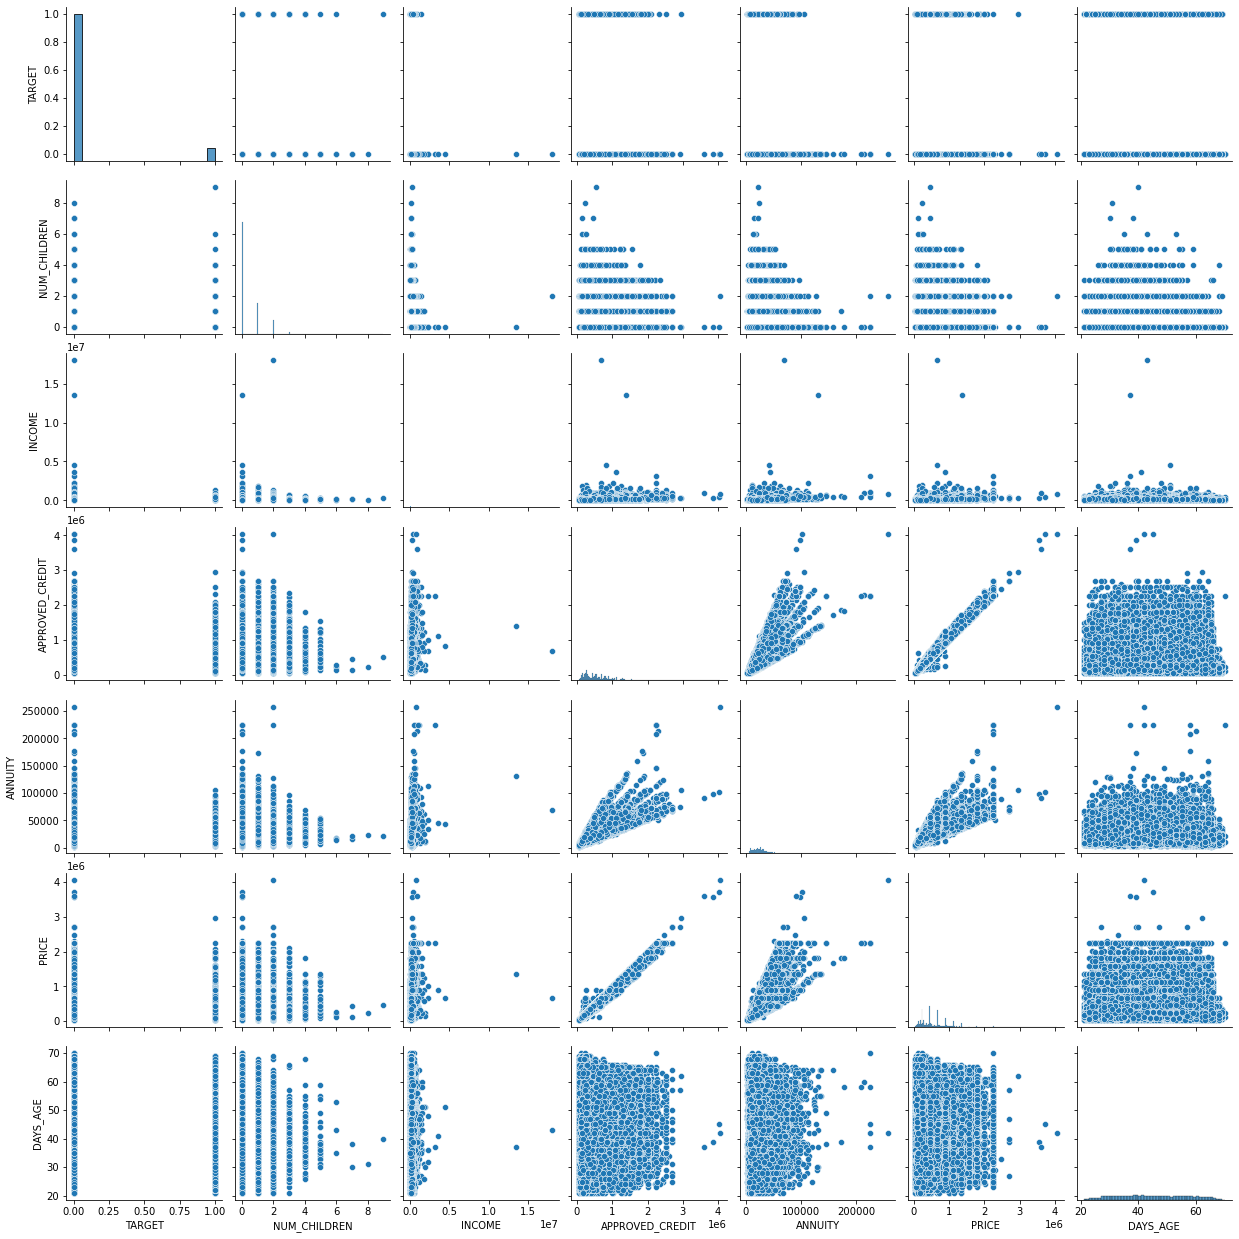

In [22]:
plt.figure(figsize=(13, 17))
sns.pairplot(data=df_train[['TARGET','NUM_CHILDREN','INCOME','APPROVED_CREDIT','ANNUITY','PRICE','DAYS_AGE']])
plt.show()

- APPROVED_CREDIT dan ANNUITY merupakan variabel yang berkolerasi baik. Jadi ketika jumlah kredit pinjaman meningkat, maka jumlah pinjaman yang harus dibayar meningkat
- APPROVED_CREDIT dan PRICE merupakan variabel yang berkolerasi baik. Jadi ketika jumlah kredit pinjaman meningkat, maka harga barang yang diberikan pinjaman juga meningkat
- ANNUITY dan PRICE merupakan variabel yang berkolerasi baik. Jadi ketika harga barang yang diberikan pinjaman juga meningkat, maka jumlah pinjaman yang harus dibayar meningkat

#### Analysis Multivariat

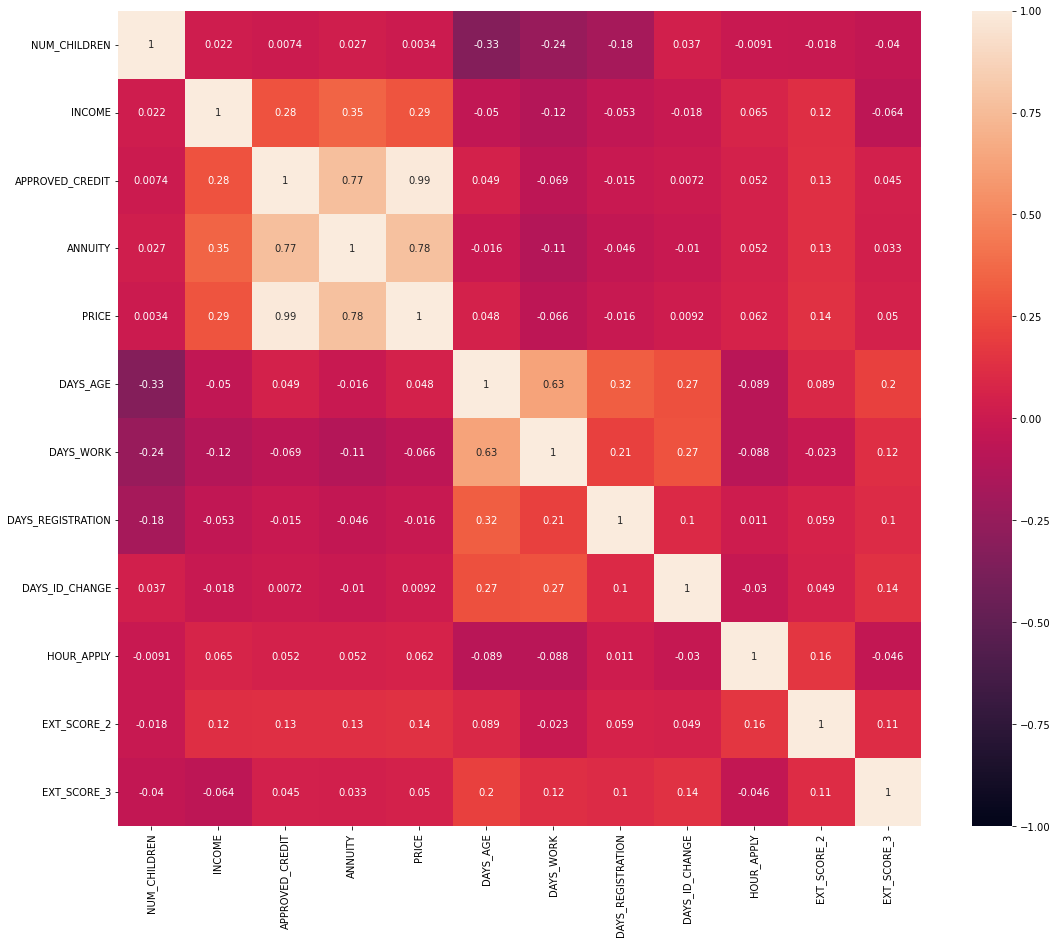

In [22]:
plt.figure(figsize=(18, 15))
features_corr = df_train[numerical_cols].corr()
sns.heatmap(features_corr, annot=True, vmin=-1, vmax=1)
plt.show()

## Data Preparation For Modeling

#### Impute Missing Value

In [23]:
df_train['PRICE'].fillna(df_train['PRICE'].mean(), inplace=True)
df_train['ANNUITY'].fillna(df_train['ANNUITY'].mean(), inplace=True)
df_train['EXT_SCORE_2'].fillna(df_train['EXT_SCORE_2'].mean(), inplace=True)
df_train['EXT_SCORE_3'].fillna(df_train['EXT_SCORE_3'].mean(), inplace=True)

In [24]:
df_train.isnull().sum().sum()

0

#### Remove Outliers

In [26]:

df_train = df_train[(df_train.NUM_CHILDREN < (df_train.NUM_CHILDREN.mean() + 3*df_train.NUM_CHILDREN.std())) & \
                    (df_train.NUM_CHILDREN > (df_train.NUM_CHILDREN.mean() - 3*df_train.NUM_CHILDREN.std()))]

df_train = df_train[(df_train.INCOME < (df_train.INCOME.mean() + 3*df_train.INCOME.std())) & \
                    (df_train.INCOME > (df_train.INCOME.mean() - 3*df_train.INCOME.std()))]

df_train = df_train[(df_train.APPROVED_CREDIT < (df_train.APPROVED_CREDIT.mean() + 3*df_train.APPROVED_CREDIT.std())) & \
                    (df_train.APPROVED_CREDIT > (df_train.APPROVED_CREDIT.mean() - 3*df_train.APPROVED_CREDIT.std()))]

df_train = df_train[(df_train.ANNUITY < (df_train.ANNUITY.mean() + 3*df_train.ANNUITY.std())) & \
                    (df_train.ANNUITY > (df_train.ANNUITY.mean() - 3*df_train.ANNUITY.std()))]

df_train = df_train[(df_train.PRICE < (df_train.PRICE.mean() + 3*df_train.PRICE.std())) & \
                    (df_train.PRICE > (df_train.PRICE.mean() - 3*df_train.PRICE.std()))]

df_train = df_train[(df_train.DAYS_WORK < (df_train.DAYS_WORK.mean() + 3*df_train.DAYS_WORK.std())) & \
                    (df_train.DAYS_WORK > (df_train.DAYS_WORK.mean() - 3*df_train.DAYS_WORK.std()))]

df_train = df_train[(df_train.DAYS_REGISTRATION < (df_train.DAYS_REGISTRATION.mean() + 3*df_train.DAYS_REGISTRATION.std())) & \
                    (df_train.DAYS_REGISTRATION > (df_train.DAYS_REGISTRATION.mean() - 3*df_train.DAYS_REGISTRATION.std()))]

df_train = df_train[(df_train.HOUR_APPLY < (df_train.HOUR_APPLY.mean() + 3*df_train.HOUR_APPLY.std())) & \
                    (df_train.HOUR_APPLY > (df_train.HOUR_APPLY.mean() - 3*df_train.HOUR_APPLY.std()))]

<AxesSubplot:xlabel='PRICE', ylabel='ANNUITY'>

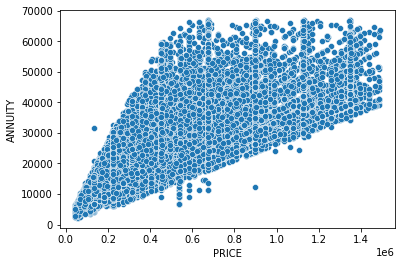

In [27]:
sns.scatterplot(data=df_train, x="PRICE", y="ANNUITY")

#### Categorical Encoder

In [28]:
contract_type = pd.get_dummies(df_train.CONTRACT_TYPE, prefix='CONTRACT_TYPE')
income_type = pd.get_dummies(df_train.INCOME_TYPE, prefix='INCOME_TYPE')
housing_type = pd.get_dummies(df_train.HOUSING_TYPE, prefix='HOUSING_TYPE')
family_status = pd.get_dummies(df_train.FAMILY_STATUS, prefix='FAMILY_STATUS')

In [31]:
def category_to_number(features):
    for feature in features:
        feature_list = list(np.unique(df_train[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
            feature_dict[feature_list[i]] = i
        df_train.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [32]:
category_to_number(['GENDER', 'EDUCATION', 'WEEKDAYS_APPLY', 'ORGANIZATION_TYPE'])

GENDER --> {'F': 0, 'M': 1}
EDUCATION --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary': 4}
WEEKDAYS_APPLY --> {'FRIDAY': 0, 'MONDAY': 1, 'SATURDAY': 2, 'SUNDAY': 3, 'THURSDAY': 4, 'TUESDAY': 5, 'WEDNESDAY': 6}
ORGANIZATION_TYPE --> {'Advertising': 0, 'Agriculture': 1, 'Bank': 2, 'Business Entity Type 1': 3, 'Business Entity Type 2': 4, 'Business Entity Type 3': 5, 'Cleaning': 6, 'Construction': 7, 'Culture': 8, 'Electricity': 9, 'Emergency': 10, 'Government': 11, 'Hotel': 12, 'Housing': 13, 'Industry: type 1': 14, 'Industry: type 10': 15, 'Industry: type 11': 16, 'Industry: type 12': 17, 'Industry: type 13': 18, 'Industry: type 2': 19, 'Industry: type 3': 20, 'Industry: type 4': 21, 'Industry: type 5': 22, 'Industry: type 6': 23, 'Industry: type 7': 24, 'Industry: type 8': 25, 'Industry: type 9': 26, 'Insurance': 27, 'Kindergarten': 28, 'Legal Services': 29, 'Medicine': 30, 'Military': 31, 'Mobile': 32, 'NA1': 33, 'Other': 34, 

In [33]:
df_train = pd.concat([
    df_train.drop(['CONTRACT_TYPE', 'INCOME_TYPE', 'HOUSING_TYPE', 'FAMILY_STATUS'], axis=1),
    contract_type,
    income_type,
    housing_type,
    family_status
    ], axis=1)

In [34]:
final_datas = df_train.copy()
print(final_datas.shape)
final_datas.head()

(58202, 35)


,TARGET,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,EDUCATION,DAYS_AGE,DAYS_WORK,...,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single,FAMILY_STATUS_Widow
0,0,0,1,67500.0,202500.0,10125.0,202500.0,4,32,921,...,0,0,0,0,0,1,1,0,0,0
1,0,0,1,202500.0,976711.5,49869.0,873000.0,4,43,4482,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,180000.0,407520.0,25060.5,360000.0,4,57,365243,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,225000.0,808650.0,26086.5,675000.0,1,57,10455,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,135000.0,180000.0,9000.0,180000.0,4,25,1190,...,0,1,0,0,0,0,0,0,1,0


## Spliting Datasets and Feature Scaling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [36]:
X = final_datas.drop('TARGET', axis=1)
Y = final_datas['TARGET']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35, stratify=Y)

In [38]:
to_scale = [col for col in x_train.columns if x_train[col].max()>1]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x_train[to_scale])
x_train[to_scale] = scaler.transform(x_train[to_scale])
x_test[to_scale] = scaler.transform(x_test[to_scale])

## Build Regressor Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, classification_report, roc_auc_score, roc_curve

#### Logistik Regression Model

In [38]:
%%time

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(x_train, y_train)

CPU times: total: 1.05 s
Wall time: 1.07 s


LogisticRegression()

In [39]:
lr_score_train = lr_model.score(x_train, y_train)
lr_score_test = lr_model.score(x_test, y_test)

(lr_score_train, lr_score_test)

(0.9174416357037005, 0.9173610514560605)

In [40]:
lr_predict = lr_model.predict(x_test)

print('Accuracy Score is - {:.2f} %'.format(accuracy_score(lr_predict, y_test)))
print(classification_report(y_test, lr_predict))

Accuracy Score is - 0.92 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10683
           1       0.25      0.00      0.00       958

    accuracy                           0.92     11641
   macro avg       0.58      0.50      0.48     11641
weighted avg       0.86      0.92      0.88     11641



#### Random Forest Model

In [73]:
%%time

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

CPU times: total: 18.3 s
Wall time: 28 s


RandomForestClassifier()

In [74]:
rf_score_train = rf_model.score(x_train, y_train)
rf_score_test = rf_model.score(x_test, y_test)

(rf_score_train, rf_score_test)

(0.9999570455960998, 0.9178764710935486)

In [75]:
rf_predict = rf_model.predict(x_test)

print('Accuracy Score is - {:.2f} %'.format(accuracy_score(rf_predict, y_test)))
print(classification_report(y_test, rf_predict))

Accuracy Score is - 0.92 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10683
           1       1.00      0.00      0.00       958

    accuracy                           0.92     11641
   macro avg       0.96      0.50      0.48     11641
weighted avg       0.92      0.92      0.88     11641



#### Tune Hyperparameters

In [79]:
rf_model_tune = RandomForestClassifier(n_estimators=500,
                                     n_jobs=1,
                                     random_state=50, 
                                     class_weight={0:1, 1:3},
                                     min_impurity_decrease=1e-7,
                                     max_depth=7)
rf_model_tune.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=7,
                       min_impurity_decrease=1e-07, n_estimators=500, n_jobs=1,
                       random_state=50)

In [80]:
rf_predict_train = rf_model_tune.predict(x_train)
rf_predict_test = rf_model_tune.predict(x_test)

print('Training Accuracy Score is - {:.2f} %'.format(accuracy_score(rf_predict_train, y_train)))
print('Testing Accuracy Score is - {:.2f} %'.format(accuracy_score(rf_predict_test, y_test)))
print('Precission Score is - {:.2f} %'.format(precision_score(y_test, rf_predict_test)))
print('ROC AUC Score is - {:.2f} %'.format(roc_auc_score(y_test, rf_predict_test)))

Training Accuracy Score is - 0.92 %
Testing Accuracy Score is - 0.92 %
Precission Score is - 0.75 %
ROC AUC Score is - 0.50 %


In [81]:
print(classification_report(y_test, rf_predict_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10683
           1       0.75      0.01      0.02       958

    accuracy                           0.92     11641
   macro avg       0.83      0.50      0.49     11641
weighted avg       0.90      0.92      0.88     11641



In [60]:
def optimal_class(number):
    rm_model = RandomForestClassifier(n_jobs=1,
                                     random_state=42, 
                                     class_weight={0:1, 1:number},
                                     min_impurity_decrease=1e-7,
                                     max_depth=7)

    rm_model.fit(x_train, y_train)
    train_acc = rm_model.score(x_train, y_train)
    test_acc = rm_model.score(x_test, y_test)
    return {'Class Number': number, 'Train Accuracy':train_acc, 'Validation Accuracy': test_acc}

In [61]:
rf_df = pd.DataFrame([optimal_class(number) for number in range(1,10)])
rf_df

,Class Number,Train Accuracy,Validation Accuracy
0,1,0.917656,0.917705
1,2,0.917699,0.917705
2,3,0.918537,0.917791
3,4,0.917098,0.915042
4,5,0.910397,0.904733
5,6,0.890853,0.884718
6,7,0.867486,0.859548
7,8,0.840897,0.829997
8,9,0.805417,0.793746


#### Computing AUROC and ROC curve values

In [44]:
r_probs = [0 for _ in range(len(y_test))]
lrg_probs= lr_model.predict_proba(x_test)
rf_probs = rf_model.predict_proba(x_test)

In [45]:
lrg_probs = lrg_probs[:, 1]
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
lrg_auc = roc_auc_score(y_test, lrg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regresion: AUROC = %.3f' % (lrg_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regresion: AUROC = 0.738
Random Forest: AUROC = 0.710


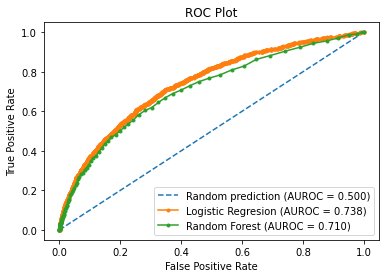

In [46]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lrg_fpr, lrg_tpr, _ = roc_curve(y_test, lrg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lrg_fpr, lrg_tpr, marker='.', label='Logistic Regresion (AUROC = %0.3f)' % lrg_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### Reverences

- https://www.analyticsvidhya.com/blog/2022/03/exploratory-data-analysis-eda-credit-card-fraud-detection-case-study/#h2_4
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#h2_5
- https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85